## Necesary Imports

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# To print all rows and columns
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',100)

In [3]:
# To ignore warnings
warnings.filterwarnings('ignore')

## Loading Files

In [6]:
train_df = pd.read_csv("train.csv",header='infer')

In [7]:
train_df.head()

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
0,6.913030e+11,2.655774e+09,194,Developer,0.98,0.02,53,88,93,32,88,106,41,66,42,47,13,15,6,Neutral,Neutral,98,37,No,Yes,Yes,Consider
1,9.214326e+11,7.123846e+08,234,Sales,0.67,0.33,51,53,44,36,93,313,28,62,32,52,5,15,4,Neutral,Negative,54,33,No,No,Yes,Consider
2,4.718839e+10,8.445533e+08,267,Program Manager,0.81,0.19,60,77,75,54,52,67,26,14,57,34,4,7,3,Positive,Positive,31,58,No,Yes,No,Consider
3,9.943741e+11,6.511106e+09,199,Marketing,0.69,0.31,93,42,103,49,115,166,62,55,65,75,10,10,7,Positive,Negative,24,35,No,Yes,No,Consider
4,3.509007e+11,3.487001e+09,221,QA Automation,0.57,0.43,44,44,119,66,190,394,7,32,36,74,13,7,3,Negative,Positive,73,60,Yes,Yes,No,Consider


In [6]:
test_df = pd.read_csv('test.csv',header='infer')

In [7]:
test_df.head()

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask
0,702127796635,2.381365e+09,229,Product Manager,0.52,0.48,103,53,77,30,26.0,287,8,22,69.0,88,5,19.0,4.0,Positive,Negative,24.0,49,Yes,Yes,Yes
1,613490569071,8.428514e+08,194,Product Manager,0.87,0.13,54,57,57,68,179.0,253,62,40,47.0,81,1,9.0,7.0,Positive,Neutral,99.0,24,No,Yes,Yes
2,759998772623,7.681665e+09,266,QA Automation,0.60,0.40,50,117,93,36,137.0,31,40,52,57.0,13,7,15.0,3.0,Negative,Positive,16.0,16,Yes,No,Yes
3,391760082113,6.627808e+09,256,HR,0.52,0.48,102,114,66,31,176.0,242,69,66,59.0,10,10,4.0,6.0,Negative,Neutral,66.0,40,No,No,Yes
4,941599210196,1.148634e+09,267,HR,0.59,0.41,96,73,115,23,218.0,215,69,42,74.0,20,10,4.0,6.0,Positive,Positive,47.0,38,No,Yes,Yes


## Dataset information

In [8]:
train_df.shape

(5800, 27)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Interview Id        5800 non-null   float64
 1   Candidate Id        5800 non-null   float64
 2   Interviewer Id      5800 non-null   int64  
 3   Profile             5800 non-null   object 
 4   S.L.R.C             5800 non-null   float64
 5   S.L.R.I             5800 non-null   float64
 6   A.T.T               5800 non-null   int64  
 7   L.M.I               5800 non-null   int64  
 8   L.M.C               5800 non-null   int64  
 9   S.R                 5800 non-null   int64  
 10  L.J.T.C             5800 non-null   int64  
 11  L.J.T.I             5800 non-null   int64  
 12  N.I.C               5800 non-null   int64  
 13  N.I.I               5800 non-null   int64  
 14  S.P.I               5800 non-null   int64  
 15  S.P.C               5800 non-null   int64  
 16  L.A.C 

In [10]:
test_df.shape

(1200, 26)

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Interview Id        1200 non-null   int64  
 1   Candidate Id        1200 non-null   float64
 2   Interviewer Id      1200 non-null   int64  
 3   Profile             1200 non-null   object 
 4   S.L.R.C             1200 non-null   float64
 5   S.L.R.I             1199 non-null   float64
 6   A.T.T               1200 non-null   int64  
 7   L.M.I               1200 non-null   int64  
 8   L.M.C               1200 non-null   int64  
 9   S.R                 1200 non-null   int64  
 10  L.J.T.C             1199 non-null   float64
 11  L.J.T.I             1200 non-null   int64  
 12  N.I.C               1200 non-null   int64  
 13  N.I.I               1200 non-null   int64  
 14  S.P.I               1198 non-null   float64
 15  S.P.C               1200 non-null   int64  
 16  L.A.C 

## Categorical and Numerical columns

In [12]:
# Separating numerical and categorical columns
cat_cols = []
num_cols = []
for i in train_df.columns:
    if (train_df[i].dtype=='object'):
        cat_cols.append(i)
    else:
        num_cols.append(i)

In [13]:
print('Categorical Columns:',cat_cols,'\nNumerical Columns:',num_cols)

Categorical Columns: ['Profile', 'P.E.I', 'P.E.C', 'Interviewer Intro', 'Candidate into', 'Opp to ask', 'Status'] 
Numerical Columns: ['Interview Id', 'Candidate Id', 'Interviewer Id', 'S.L.R.C', 'S.L.R.I', 'A.T.T', 'L.M.I', 'L.M.C', 'S.R', 'L.J.T.C', 'L.J.T.I', 'N.I.C', 'N.I.I', 'S.P.I', 'S.P.C', 'L.A.C', 'L.A.I', 'Q.A', 'COMPLIANCE Ratio', 'Interview duration']


## Handling Nulls

In [14]:
train_null_count = pd.DataFrame(
    {'Null count':train_df.isnull().sum(),
              'Percentage':train_df.isnull().sum()/len(train_df)*100,
              'Data_Type':train_df.dtypes
   }
)
train_null_count[train_null_count.Percentage>0]

,Null count,Percentage,Data_Type
P.E.I,1,0.017241,object
P.E.C,3,0.051724,object
Interviewer Intro,1,0.017241,object
Opp to ask,1,0.017241,object
Status,4,0.068966,object


In [15]:
# We can see that our target variable also has nulls which are very small, hence we'll drop these and we'll fill others.
train_df = train_df.dropna(subset=['Status'])

In [16]:
train_df['P.E.I'].value_counts()
train_df['P.E.I'] = train_df['P.E.I'].fillna(train_df['P.E.I'].mode()[0])

In [17]:
train_df['P.E.C'].value_counts()
train_df['P.E.C'] = train_df['P.E.C'].fillna(train_df['P.E.C'].mode()[0])

In [18]:
train_df['Interviewer Intro'].value_counts()
train_df['Interviewer Intro'] = train_df['Interviewer Intro'].fillna(train_df['Interviewer Intro'].mode()[0])

In [19]:
train_df['Opp to ask'].value_counts()
train_df['Opp to ask'] = train_df['Opp to ask'].fillna(train_df['Opp to ask'].mode()[0])

In [20]:
train_null_count = pd.DataFrame(
    {'Null count':train_df.isnull().sum(),
              'Percentage':train_df.isnull().sum()/len(train_df)*100,
              'Data_Type':train_df.dtypes
   }
)
train_null_count[train_null_count.Percentage>0]

,Null count,Percentage,Data_Type


In [21]:
test_null_count = pd.DataFrame(
    {'Null count':test_df.isnull().sum(),
              'Percentage':test_df.isnull().sum()/len(test_df)*100,
              'Data_Type':test_df.dtypes
   }
)
test_null_count[test_null_count.Percentage>0]

,Null count,Percentage,Data_Type
S.L.R.I,1,0.083333,float64
L.J.T.C,1,0.083333,float64
S.P.I,2,0.166667,float64
L.A.I,1,0.083333,float64
Q.A,1,0.083333,float64
P.E.I,2,0.166667,object
P.E.C,2,0.166667,object
COMPLIANCE Ratio,1,0.083333,float64
Interviewer Intro,2,0.166667,object


In [22]:
test_df['S.L.R.I'].mean()
test_df['S.L.R.I'] = test_df['S.L.R.I'].fillna(test_df['S.L.R.I'].mean())

In [23]:
test_df['L.J.T.C'].value_counts()
test_df['L.J.T.C'].median()
test_df['L.J.T.C'] = test_df['L.J.T.C'].fillna(test_df['L.J.T.C'].median())

In [24]:
test_df['S.P.I'].mean()
test_df['S.P.I'].median()
test_df['S.P.I'] = test_df['S.P.I'].fillna(test_df['S.P.I'].median())

In [25]:
test_df['L.A.I'].mean()
test_df['L.A.I'].value_counts()
test_df['L.A.I'] = test_df['L.A.I'].fillna(test_df['L.A.I'].median())

In [26]:
test_df['Q.A'].mean()
test_df['Q.A'].value_counts()
test_df['Q.A'] = test_df['Q.A'].fillna(test_df['Q.A'].median())

In [27]:
test_df['COMPLIANCE Ratio'].mean()
test_df['COMPLIANCE Ratio'].value_counts()
test_df['COMPLIANCE Ratio'] = test_df['COMPLIANCE Ratio'].fillna(test_df['COMPLIANCE Ratio'].median())

In [28]:
test_df['P.E.I'].value_counts()
test_df['P.E.I'] = test_df['P.E.I'].fillna(test_df['P.E.I'].mode()[0])

In [29]:
test_df['P.E.C'].value_counts()
test_df['P.E.C'] = test_df['P.E.C'].fillna(test_df['P.E.C'].mode()[0])

In [30]:
test_df['Interviewer Intro'].value_counts()
test_df['Interviewer Intro'] = test_df['Interviewer Intro'].fillna(test_df['Interviewer Intro'].mode()[0])

In [31]:
test_null_count = pd.DataFrame(
    {'Null count':test_df.isnull().sum(),
              'Percentage':test_df.isnull().sum()/len(test_df)*100,
              'Data_Type':test_df.dtypes
   }
)
test_null_count[test_null_count.Percentage>0]

,Null count,Percentage,Data_Type


## Label Encoding
- To convert categorical columns to numerical columns

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
train_df.Status.value_counts()

Consider        2311
May Consider    1890
Not Consider    1595
Name: Status, dtype: int64

In [34]:
train_df.Status = train_df.Status.replace({'Consider':0,'May Consider':1,'Not Consider':2})

In [35]:
train_df[train_df.select_dtypes(include = ['object']).columns] = train_df[train_df.select_dtypes(include = ['object']).columns].apply(le.fit_transform)

In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5796 entries, 0 to 5799
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Interview Id        5796 non-null   float64
 1   Candidate Id        5796 non-null   float64
 2   Interviewer Id      5796 non-null   int64  
 3   Profile             5796 non-null   int32  
 4   S.L.R.C             5796 non-null   float64
 5   S.L.R.I             5796 non-null   float64
 6   A.T.T               5796 non-null   int64  
 7   L.M.I               5796 non-null   int64  
 8   L.M.C               5796 non-null   int64  
 9   S.R                 5796 non-null   int64  
 10  L.J.T.C             5796 non-null   int64  
 11  L.J.T.I             5796 non-null   int64  
 12  N.I.C               5796 non-null   int64  
 13  N.I.I               5796 non-null   int64  
 14  S.P.I               5796 non-null   int64  
 15  S.P.C               5796 non-null   int64  
 16  L.A.C 

In [37]:
test_df[test_df.select_dtypes(include = ['object']).columns] = test_df[test_df.select_dtypes(include = ['object']).columns].apply(le.fit_transform)

In [38]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Interview Id        1200 non-null   int64  
 1   Candidate Id        1200 non-null   float64
 2   Interviewer Id      1200 non-null   int64  
 3   Profile             1200 non-null   int32  
 4   S.L.R.C             1200 non-null   float64
 5   S.L.R.I             1200 non-null   float64
 6   A.T.T               1200 non-null   int64  
 7   L.M.I               1200 non-null   int64  
 8   L.M.C               1200 non-null   int64  
 9   S.R                 1200 non-null   int64  
 10  L.J.T.C             1200 non-null   float64
 11  L.J.T.I             1200 non-null   int64  
 12  N.I.C               1200 non-null   int64  
 13  N.I.I               1200 non-null   int64  
 14  S.P.I               1200 non-null   float64
 15  S.P.C               1200 non-null   int64  
 16  L.A.C 

## Correlation 

<AxesSubplot:>

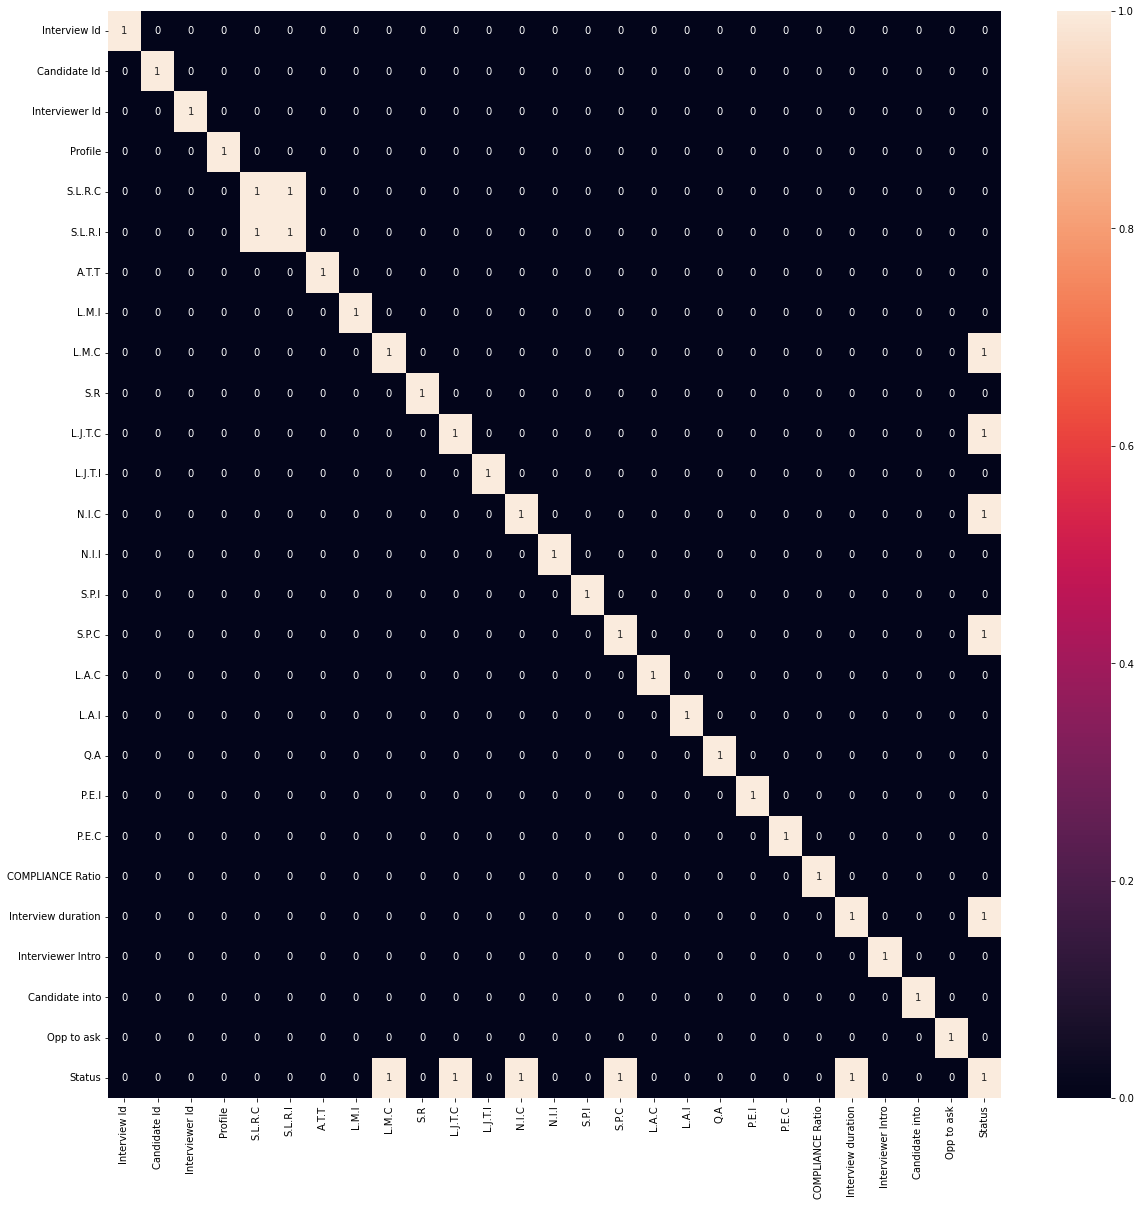

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(np.abs(train_df.corr())>0.05,annot=True)

## Dropping Unnecessary columns

In [40]:
train_df.columns

Index(['Interview Id', 'Candidate Id', 'Interviewer Id', 'Profile', 'S.L.R.C',
       'S.L.R.I', 'A.T.T', 'L.M.I', 'L.M.C', 'S.R', 'L.J.T.C', 'L.J.T.I',
       'N.I.C', 'N.I.I', 'S.P.I', 'S.P.C', 'L.A.C', 'L.A.I', 'Q.A', 'P.E.I',
       'P.E.C', 'COMPLIANCE Ratio', 'Interview duration', 'Interviewer Intro',
       'Candidate into', 'Opp to ask', 'Status'],
      dtype='object')

In [41]:
Interview_id = test_df['Interview Id']

## Checking Class balance

In [42]:
train_df.Status.value_counts()

0    2311
1    1890
2    1595
Name: Status, dtype: int64

<BarContainer object of 3 artists>

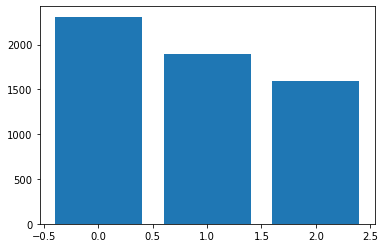

In [43]:
plt.bar(train_df.Status.unique(),train_df.Status.value_counts())

#### We have done all the preprocessing for data, now we can move towards model building

## Train-Test Split

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
train,test = train_test_split(train_df,train_size=0.75,shuffle=True)

In [46]:
print("Train data size: ", len(train),'\nTest data size:  ',len(test))

Train data size:  4347 
Test data size:   1449


In [47]:
train_x = train.iloc[:,:-1]
train_y = train.iloc[:,-1]

In [48]:
test_x = test.iloc[:,:-1]
test_y = test.iloc[:,-1]

In [49]:
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((4347, 26), (4347,), (1449, 26), (1449,))

## Model Building

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [1]:
from sklearn.model_selection import GridSearchCV

#### Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dt = DecisionTreeClassifier()

In [54]:
params_dt = [{'criterion' : ['gini',"entropy"],
          'splitter' : ["best", "random"],
          'class_weight' : ['None','balanced'],
          'max_depth':list(range(10,20+1)),
           'min_samples_split':list(range(2,11))
          }]

In [55]:
gs_dt = GridSearchCV(dt,
             param_grid=params_dt,
             scoring='accuracy',
             cv=5)

In [56]:
gs_dt.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'class_weight': ['None', 'balanced'],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                        20],
                          'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'splitter': ['best', 'random']}],
             scoring='accuracy')

In [57]:
gs_dt.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 17,
 'min_samples_split': 5,
 'splitter': 'best'}

In [58]:
gs_dt.best_score_

0.8663439281509993

In [59]:
dt = DecisionTreeClassifier(class_weight = 'balanced',
                            criterion = 'entropy', 
                            splitter = 'best',
                           max_depth = 17,
                           min_samples_split = 5)
dt.fit(train_x,train_y) 

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=17, min_samples_split=5)

In [60]:
dt_pred = dt.predict(test_x)

In [61]:
accuracy_score(test_y,dt_pred)

0.8633540372670807

In [62]:
confusion_matrix(test_y,dt_pred)

array([[533,  43,   0],
       [ 52, 377,  49],
       [  0,  54, 341]], dtype=int64)

#### Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf = RandomForestClassifier()

In [65]:
params_rf = [{'criterion' : ['gini',"entropy"],
           'n_estimators' : list(range(100,106)),
           'class_weight' : ['None','balanced'],
          'max_depth':list(range(13,18))
          }]

In [66]:
gs_rf = GridSearchCV(rf,
             param_grid=params_rf,
             scoring='accuracy',
             cv=5)

In [67]:
import time

In [68]:
start = time.time()
gs_rf.fit(train_x,train_y)
end = time.time()
end-start

225.3225736618042

In [69]:
gs_rf.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 13,
 'n_estimators': 103}

In [70]:
gs_rf.best_score_

0.9139663769956219

In [71]:
rf = RandomForestClassifier(class_weight = 'balanced',
                            criterion = 'entropy', 
                            n_estimators = 105,
                           max_depth = 14
                           )
rf.fit(train_x,train_y) 

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=14, n_estimators=105)

In [72]:
rf_pred = rf.predict(test_x)

In [73]:
accuracy_score(test_y,rf_pred)

0.893719806763285

In [74]:
confusion_matrix(test_y,rf_pred)

array([[557,  19,   0],
       [ 50, 375,  53],
       [  0,  32, 363]], dtype=int64)

#### AdaBoost

In [75]:
from sklearn.ensemble import AdaBoostClassifier

In [76]:
abc_dt = AdaBoostClassifier(dt)
abc_rf = AdaBoostClassifier(rf)

In [77]:
abc_dt.fit(train_x,train_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         criterion='entropy',
                                                         max_depth=17,
                                                         min_samples_split=5))

In [78]:
abc_dt_pred = abc_dt.predict(test_x)

In [79]:
accuracy_score(test_y,abc_dt_pred)

0.8875086266390614

In [80]:
abc_rf.fit(train_x,train_y)

AdaBoostClassifier(base_estimator=RandomForestClassifier(class_weight='balanced',
                                                         criterion='entropy',
                                                         max_depth=14,
                                                         n_estimators=105))

In [81]:
abc_rf_pred = abc_rf.predict(test_x)

In [82]:
accuracy_score(test_y,abc_rf_pred)

0.8868184955141477

In [83]:
confusion_matrix(test_y,abc_rf_pred)

array([[556,  20,   0],
       [ 60, 366,  52],
       [  0,  32, 363]], dtype=int64)

#### Voting Classifier

A voting Classifier is an ensemble meta-estimator that fits several base Classifiers, each on the whole dataset. Then it averages the individual predictions to form a final prediction.

In [84]:
from sklearn.ensemble import VotingClassifier

In [85]:
model_vr = VotingClassifier([('Model_DT', dt), ('Model_RF', rf), ('Model_ABC_DT', abc_dt),('Model_ABC_RF', abc_rf)]).fit(train_x, train_y)

In [86]:
model_vr_pred = model_vr.predict(test_x)

In [87]:
accuracy_score(test_y,model_vr_pred)

0.8930296756383713

In [88]:
confusion_matrix(test_y,model_vr_pred)

array([[558,  18,   0],
       [ 67, 376,  35],
       [  0,  35, 360]], dtype=int64)

#### Bagging Classifier

A Bagging Classifier is an ensemble meta-estimator that fits base Classifiers each on random subsets of the original dataset and then aggregate their individual predictions by averaging to form a final prediction. 

In [89]:
from sklearn.ensemble import BaggingClassifier

In [90]:
model_br_dt = BaggingClassifier(dt).fit(train_x, train_y)
model_br_dt_pred= model_br_dt.predict(test_x)
accuracy_score(test_y, model_br_dt_pred)

0.9109730848861284

In [91]:
confusion_matrix(test_y,model_br_dt_pred)

array([[548,  28,   0],
       [ 35, 413,  30],
       [  0,  36, 359]], dtype=int64)

In [92]:
model_br_rf = BaggingClassifier(rf).fit(train_x, train_y)
model_br_rf_pred= model_br_rf.predict(test_x)
accuracy_score(test_y, model_br_rf_pred)

0.8916494133885439

In [93]:
confusion_matrix(test_y,model_br_rf_pred)

array([[557,  19,   0],
       [ 57, 372,  49],
       [  0,  32, 363]], dtype=int64)

In [94]:
model_br_abc_dt = BaggingClassifier(abc_dt).fit(train_x, train_y)
model_br_abc_dt_pred= model_br_abc_dt.predict(test_x)
accuracy_score(test_y, model_br_abc_dt_pred)

0.8792270531400966

In [95]:
confusion_matrix(test_y,model_br_abc_dt_pred)

array([[548,  28,   0],
       [ 59, 363,  56],
       [  0,  32, 363]], dtype=int64)

In [96]:
model_br_abc_rf = BaggingClassifier(abc_rf).fit(train_x, train_y)
model_br_abc_rf_pred= model_br_abc_rf.predict(test_x)
accuracy_score(test_y, model_br_abc_rf_pred)

0.893719806763285

In [97]:
confusion_matrix(test_y,model_br_abc_rf_pred)

array([[555,  21,   0],
       [ 58, 371,  49],
       [  0,  26, 369]], dtype=int64)

#### Stacking Classifier

In this strategy, some "base estimators" are individually fitted on some training data while a "final estimator" is trained using the stacked predictions of these base estimators.

In [98]:
from sklearn.ensemble import StackingClassifier

In [99]:
baseModels = [('Model_DT', dt), ('Model_RF', rf), ('Model_ABC_DT', abc_dt)]
finalModel = abc_rf

In [100]:
model_sr = StackingClassifier(estimators = baseModels, final_estimator = finalModel).fit(train_x, train_y)

In [101]:
model_sr_pred = model_sr.predict(test_x)

In [102]:
accuracy_score(test_y,model_sr_pred)

0.8971704623878537

In [103]:
confusion_matrix(test_y,model_sr_pred)

array([[549,  27,   0],
       [ 50, 388,  40],
       [  0,  32, 363]], dtype=int64)

#### Handling Class Imbalance

In [104]:
class_2 = train_df[train_df.Status==1]
class_3 = train_df[train_df.Status==2]

In [105]:
train.Status.value_counts()

0    1735
1    1412
2    1200
Name: Status, dtype: int64

In [106]:
class_2_sample = class_2.sample(300)
class_3_sample = class_3.sample(550)

In [107]:
train = pd.concat([train,class_2_sample,class_3_sample])

In [108]:
train.Status.value_counts()

2    1750
0    1735
1    1712
Name: Status, dtype: int64

In [109]:
print("Train data size: ", len(train),'\nTest data size:  ',len(test))

Train data size:  5197 
Test data size:   1449


In [110]:
train_x = train.iloc[:,:-1]
train_y = train.iloc[:,-1]

### Models after Balancing classes

#### Decision Tree

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
dt = DecisionTreeClassifier()

In [113]:
params_dt = [{'criterion' : ['gini',"entropy"],
          'splitter' : ["best", "random"],
          'class_weight' : ['None','balanced'],
          'max_depth':list(range(10,20+1)),
           'min_samples_split':list(range(2,11))
          }]

In [114]:
gs_dt = GridSearchCV(dt,
             param_grid=params_dt,
             scoring='accuracy',
             cv=5)

In [115]:
gs_dt.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'class_weight': ['None', 'balanced'],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                        20],
                          'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'splitter': ['best', 'random']}],
             scoring='accuracy')

In [116]:
gs_dt.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_split': 3,
 'splitter': 'best'}

In [117]:
gs_dt.best_score_

0.9064879321833125

In [118]:
dt = DecisionTreeClassifier(class_weight = 'balanced',
                            criterion = 'entropy', 
                            splitter = 'best',
                           max_depth = 17,
                           min_samples_split = 5)
dt.fit(train_x,train_y) 

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=17, min_samples_split=5)

In [119]:
dt_pred = dt.predict(test_x)

In [120]:
accuracy_score(test_y,dt_pred)

0.8771566597653554

In [121]:
confusion_matrix(test_y,dt_pred)

array([[534,  41,   1],
       [ 40, 383,  55],
       [  0,  41, 354]], dtype=int64)

#### Random Forest

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
rf = RandomForestClassifier()

In [124]:
params_rf = [{'criterion' : ['gini',"entropy"],
           'n_estimators' : list(range(100,106)),
           'class_weight' : ['None','balanced'],
          'max_depth':list(range(13,18))
          }]

In [125]:
gs_rf = GridSearchCV(rf,
             param_grid=params_rf,
             scoring='accuracy',
             cv=5)

In [126]:
import time

In [127]:
start = time.time()
gs_rf.fit(train_x,train_y)
end = time.time()
end-start

269.07401418685913

In [128]:
gs_rf.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 14,
 'n_estimators': 105}

In [129]:
gs_rf.best_score_

0.9378492633449322

In [130]:
rf = RandomForestClassifier(class_weight = 'balanced',
                            criterion = 'entropy', 
                            n_estimators = 101,
                           max_depth = 16
                           )
rf.fit(train_x,train_y) 

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=16, n_estimators=101)

In [131]:
rf_pred = rf.predict(test_x)

In [132]:
accuracy_score(test_y,rf_pred)

0.9061421670117322

In [133]:
confusion_matrix(test_y,rf_pred)

array([[550,  26,   0],
       [ 47, 386,  45],
       [  0,  18, 377]], dtype=int64)

#### AdaBoost

In [134]:
from sklearn.ensemble import AdaBoostClassifier

In [135]:
abc_dt = AdaBoostClassifier(dt)
abc_rf = AdaBoostClassifier(rf)

In [136]:
abc_dt.fit(train_x,train_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         criterion='entropy',
                                                         max_depth=17,
                                                         min_samples_split=5))

In [137]:
abc_dt_pred = abc_dt.predict(test_x)

In [138]:
accuracy_score(test_y,abc_dt_pred)

0.8957902001380262

In [139]:
abc_rf.fit(train_x,train_y)

AdaBoostClassifier(base_estimator=RandomForestClassifier(class_weight='balanced',
                                                         criterion='entropy',
                                                         max_depth=16,
                                                         n_estimators=101))

In [140]:
abc_rf_pred = abc_rf.predict(test_x)

In [141]:
accuracy_score(test_y,abc_rf_pred)

0.9164941338854382

In [142]:
confusion_matrix(test_y,abc_rf_pred)

array([[554,  22,   0],
       [ 37, 397,  44],
       [  0,  18, 377]], dtype=int64)

#### XGBoost

In [143]:
from xgboost import XGBClassifier

In [201]:
xgb = XGBClassifier(n_estimators = 1000)

In [202]:
xgb.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [203]:
pred_xgb = xgb.predict(test_x)

In [204]:
accuracy_score(test_y,pred_xgb)

0.9516908212560387

In [205]:
xgb.fit(train_df.iloc[:,:-1],train_df.iloc[:,-1])

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

#### LightGBM

In [149]:
from lightgbm import LGBMClassifier

In [150]:
lgbm = LGBMClassifier(objective="mutliclass", n_estimators=1000)

In [151]:
lgbm.fit(train_x,train_y)

LGBMClassifier(n_estimators=1000, objective='mutliclass')

In [152]:
pred_lgbm = lgbm.predict(test_x)

In [153]:
accuracy_score(test_y,pred_lgbm)

0.9503105590062112

In [154]:
confusion_matrix(test_y,pred_lgbm)

array([[558,  18,   0],
       [ 14, 440,  24],
       [  0,  16, 379]], dtype=int64)

In [182]:
lgbm.fit(train_df.iloc[:,:-1],train_df.iloc[:,-1])

LGBMClassifier(n_estimators=1000, objective='mutliclass')

#### Voting Classifier

A voting Classifier is an ensemble meta-estimator that fits several base Classifiers, each on the whole dataset. Then it averages the individual predictions to form a final prediction.

In [155]:
from sklearn.ensemble import VotingClassifier

In [156]:
model_vr = VotingClassifier([('Model_DT', dt), ('Model_RF', rf), ('Model_ABC_DT', abc_dt),('Model_ABC_RF', abc_rf),('Model_XGB', xgb),('Model_LGBM', lgbm)]).fit(train_x, train_y)

In [157]:
model_vr_pred = model_vr.predict(test_x)

In [158]:
accuracy_score(test_y,model_vr_pred)

0.9330572808833678

In [159]:
confusion_matrix(test_y,model_vr_pred)

array([[560,  16,   0],
       [ 27, 423,  28],
       [  0,  26, 369]], dtype=int64)

#### Bagging Classifier

A Bagging Classifier is an ensemble meta-estimator that fits base Classifiers each on random subsets of the original dataset and then aggregate their individual predictions by averaging to form a final prediction. 

In [160]:
from sklearn.ensemble import BaggingClassifier

In [161]:
model_br_dt = BaggingClassifier(dt).fit(train_x, train_y)
model_br_dt_pred= model_br_dt.predict(test_x)
accuracy_score(test_y, model_br_dt_pred)

0.927536231884058

In [162]:
confusion_matrix(test_y,model_br_dt_pred)

array([[548,  28,   0],
       [ 24, 422,  32],
       [  0,  21, 374]], dtype=int64)

In [163]:
model_br_rf = BaggingClassifier(rf).fit(train_x, train_y)
model_br_rf_pred= model_br_rf.predict(test_x)
accuracy_score(test_y, model_br_rf_pred)

0.906832298136646

In [164]:
confusion_matrix(test_y,model_br_rf_pred)

array([[551,  25,   0],
       [ 43, 382,  53],
       [  0,  14, 381]], dtype=int64)

In [165]:
model_br_abc_dt = BaggingClassifier(abc_dt).fit(train_x, train_y)
model_br_abc_dt_pred= model_br_abc_dt.predict(test_x)
accuracy_score(test_y, model_br_abc_dt_pred)

0.8957902001380262

In [166]:
confusion_matrix(test_y,model_br_abc_dt_pred)

array([[543,  33,   0],
       [ 45, 380,  53],
       [  0,  20, 375]], dtype=int64)

In [167]:
model_br_abc_rf = BaggingClassifier(abc_rf).fit(train_x, train_y)
model_br_abc_rf_pred= model_br_abc_rf.predict(test_x)
accuracy_score(test_y, model_br_abc_rf_pred)

0.906832298136646

In [168]:
confusion_matrix(test_y,model_br_abc_rf_pred)

array([[549,  27,   0],
       [ 45, 386,  47],
       [  0,  16, 379]], dtype=int64)

In [169]:
model_br_xgb = BaggingClassifier(xgb).fit(train_x, train_y)
model_br_xgb_pred= model_br_xgb.predict(test_x)
accuracy_score(test_y, model_br_xgb_pred)

0.9427191166321601

In [170]:
confusion_matrix(test_y,model_br_xgb_pred)

array([[552,  24,   0],
       [ 17, 435,  26],
       [  0,  16, 379]], dtype=int64)

In [171]:
model_br_lgbm = BaggingClassifier(lgbm).fit(train_x, train_y)
model_br_lgbm_pred= model_br_lgbm.predict(test_x)
accuracy_score(test_y, model_br_lgbm_pred)

0.9489302967563837

In [172]:
confusion_matrix(test_y,model_br_lgbm_pred)

array([[557,  19,   0],
       [ 17, 439,  22],
       [  0,  16, 379]], dtype=int64)

#### Stacking Classifier

In this strategy, some "base estimators" are individually fitted on some training data while a "final estimator" is trained using the stacked predictions of these base estimators.

In [173]:
from sklearn.ensemble import StackingClassifier

In [223]:
baseModels = [('Model_DT', dt), ('Model_RF', rf), ('Model_ABC_DT', abc_dt),('Model_ABC_RF', abc_rf),('Model_LGBM', lgbm)]
finalModel = xgb

In [224]:
model_sr = StackingClassifier(estimators = baseModels, final_estimator = finalModel).fit(train_x, train_y)

In [225]:
model_sr_pred = model_sr.predict(test_x)

In [226]:
accuracy_score(test_y,model_sr_pred)

0.9620427881297446

In [227]:
confusion_matrix(test_y,model_sr_pred)

array([[567,   9,   0],
       [ 16, 440,  22],
       [  0,   8, 387]], dtype=int64)

In [228]:
model_sr.fit(train_df.iloc[:,:-1],train_df.Status)

StackingClassifier(estimators=[('Model_DT',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       criterion='entropy',
                                                       max_depth=17,
                                                       min_samples_split=5)),
                               ('Model_RF',
                                RandomForestClassifier(class_weight='balanced',
                                                       criterion='entropy',
                                                       max_depth=16,
                                                       n_estimators=101)),
                               ('Model_ABC_DT',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balance...
                                                 grow_policy='depthwise',
                                                 importance_type=None,
  

In [229]:
pd.DataFrame({"Interview Id":Interview_id,"Status":model_sr.predict(test_df)}).replace({0:'Consider',1:'May Consider',2:'Not Consider'}).to_csv("C://Users/shubh/Downloads/Hackathon_Stage_2/Submission_sr3.csv",index=False)